In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [3]:
# 데이터가 없어서 일단은 유방암 데이터로 진행(나중에 승현님한테서 데이터 받아 대체해야함)
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df

# 데이터프레임에서 10개의 열만 사용
df = df.iloc[:, :10]

# 타겟 데이터를 가져와서 데이터프레임에 label이라는 열로 추가
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

# 확인
df.head(3)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다.
- 종속 변수는 마지막 열입니다.

In [5]:
from sklearn.tree import DecisionTreeClassifier


# 로지스틱 회귀 모델 생성
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier()

## 모델을 생성합니다.

선택한 모델은 decision tree classifier입니다. 
- decision tree는 데이터를 분류하는 모델로, 데이터를 분류하기 위해 질문을 던지며, 이 질문에 대한 답변에 따라 데이터를 분류합니다. 여기서 질문은 데이터의 특성을 기준으로 합니다.
전처리를 수행한 데이터에 대해서 decision tree classifier을 학습시키고, 학습된 모델을 사용하여 예측을 수행해보겠습니다.

## decision tree classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수 (지니 불순도)
$$
I_G(t) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$

1. max_depth : 트리의 최대 깊이
2. min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
3. min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수
4. max_features : 최적의 분할을 위해 고려할 최대 피처 개수
5. max_leaf_nodes : 리프노드의 최대 개수
6. min_impurity_decrease : 불순도 감소 최소량
7. class_weight : 클래스 가중치
8. ccp_alpha : 최소 비용 복잡성 가지치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수
- 위의 하이퍼파라미터들은 모두 트리의 복잡도를 조절하는데 사용됩니다. 자세한 내용은 아래의 링크를 참고하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

위의 모든 하이퍼파라미터를 조정하여 최적의 모델을 찾아보겠습니다.

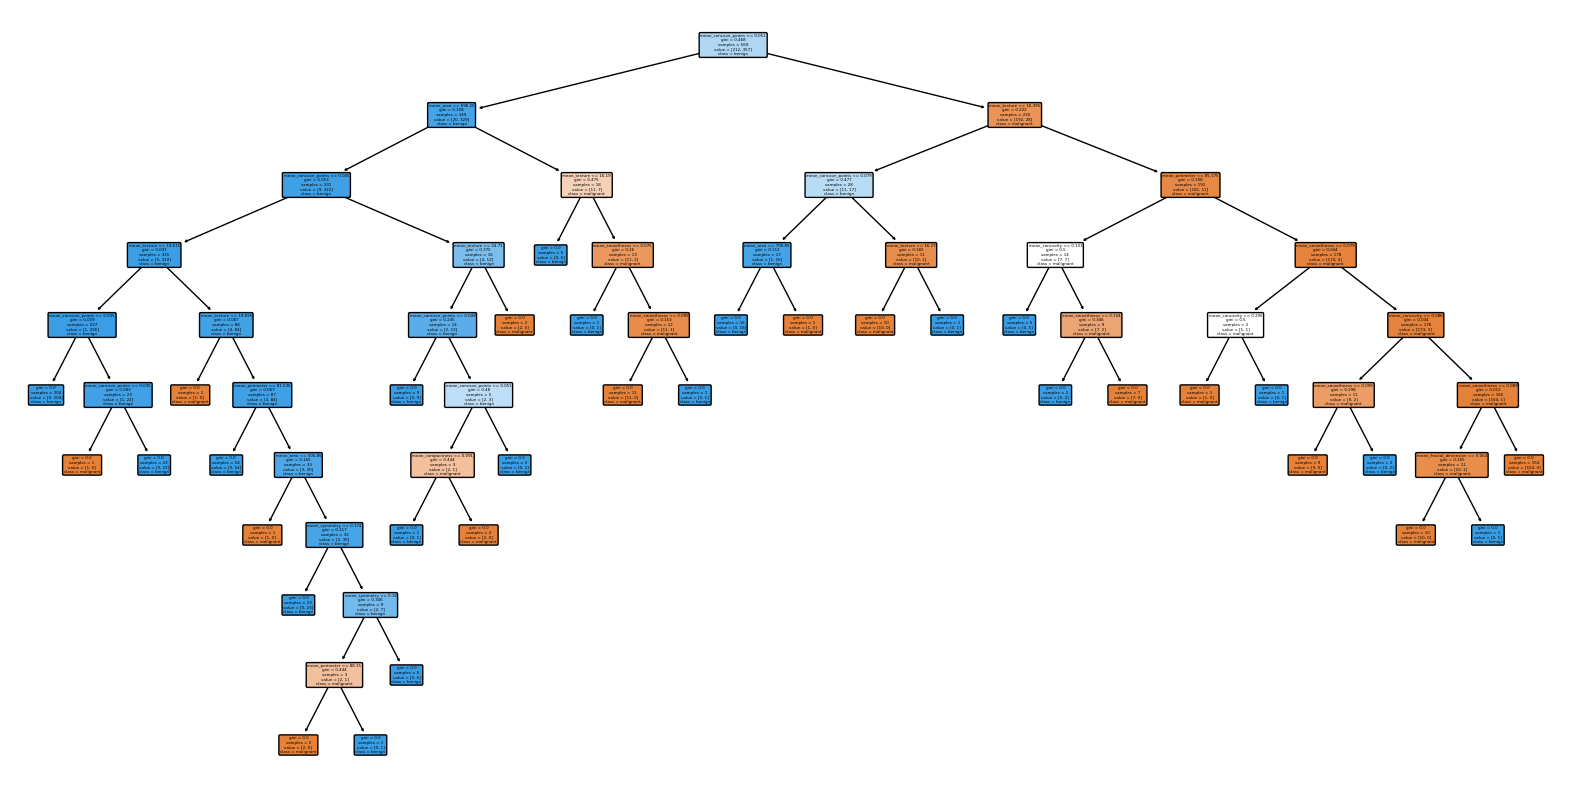

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # 플롯 사이즈 조정
plot_tree(model, filled=True, feature_names=X.columns, class_names=["malignant", "benign"], rounded=True)
plt.show()

## decision tree classifier의 시각화

위 그림은 결정나무의 시각화 결과입니다. 이를 통해 어떤 특성이 가장 중요한지 알 수 있습니다. 또한, 특성의 중요도를 확인할 수 있습니다.

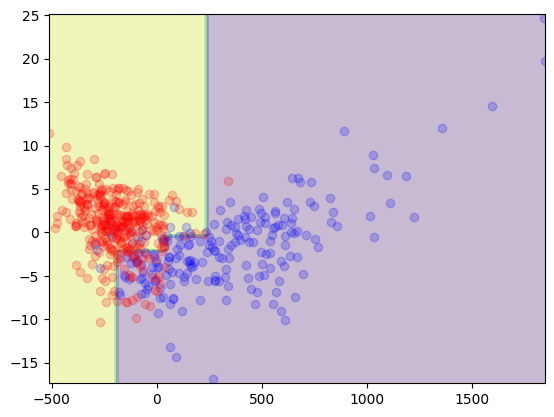

In [17]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pca.fit(X_pca, y)

# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = model_pca.predict(X_new).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.2)
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.2)
plt.show()

## 결정 경계 시각화

위 그림은 PCA를 사용하여 피처를 2개로 줄인 후 결정 트리 모델을 학습한 결과입니다. 결정 경계가 수직으로 꺾여 나타나는 것을 확인할 수 있습니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

In [15]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[212,   0],
       [  0, 357]])

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 182개의 양성 샘플을 양성으로 정확하게 예측했습니다.
- 344개의 음성 샘플을 음성으로 정확하게 예측했습니다.
- 30개의 양성 샘플을 음성으로 잘못 예측했습니다.
- 11개의 음성 샘플을 양성으로 잘못 예측했습니다.

**나중에 실제 독성 데이터로 대체 후, 구체적인 값은 결과에 맞춰 대체해야 함**